In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Fri Jun 30 13:03:54 2017
3.6.1 


# C: How to read and write files (ASCII and FITS)

This is part of the Python lecture given by Christophe Morisset at IA-UNAM.

Some informations are here: http://www.tutorialspoint.com/python/python_files_io.htm

## Reading a simple ascii file

In [2]:
# numpy is needed in some part of the lecture
import numpy as np

First of all, we will have to have some files on the hard drive to read them The following notebook cell will write a file in the same directory where the notebook has been started.

In [3]:
%%writefile data1.dat
1   2.3  6   8 star
2   3.5  7   9 galaxy
3  -4.2  5   7 cluster

Overwriting data1.dat


Now the goal is to read this file. The first way is to open the file, read it completely in a variable and close the file. Then we can play with the content of the file.

In [4]:
datafile = open('data1.dat', 'r') # Open the file to read it

In [5]:
data = datafile.readlines() # The variable data will receive the content of the file.

In [6]:
datafile.close() # Not need anymore of the file.

In [7]:
print(type(data)) # The data file is stored in the form of a list, each element of the list corresponding to a row of the list.

<class 'list'>


In [8]:
print(data) # Each row is a string and terminates with \n, symbol of END OF LINE.

['1   2.3  6   8 star\n', '2   3.5  7   9 galaxy\n', '3  -4.2  5   7 cluster']


In [9]:
print(len(data)) # number of rows

3


In [10]:
print(data[0], 'tralala')

1   2.3  6   8 star
 tralala


In [11]:
for row in data:
    print(row)

1   2.3  6   8 star

2   3.5  7   9 galaxy

3  -4.2  5   7 cluster


In [12]:
# In python :
for row in data:
    print(row),

1   2.3  6   8 star

2   3.5  7   9 galaxy

3  -4.2  5   7 cluster


In [13]:
# In python 3:
for row in data:
    print(row, end='')

1   2.3  6   8 star
2   3.5  7   9 galaxy
3  -4.2  5   7 cluster

In [14]:
print(type(data[0])) # Each element is a string

<class 'str'>


Now it is easy to separate each field with the split command: 

In [15]:
for row in data:
    print(row.split())

['1', '2.3', '6', '8', 'star']
['2', '3.5', '7', '9', 'galaxy']
['3', '-4.2', '5', '7', 'cluster']


In [16]:
# One can also transform the data if the type is known:
for row in data:
    this_data = row.split()
    print('N = {0:2d} f = {1:5.2f} type = {2:>10s}'.format(int(this_data[0]), 
                                                           float(this_data[1]), 
                                                           this_data[4]))

N =  1 f =  2.30 type =       star
N =  2 f =  3.50 type =     galaxy
N =  3 f = -4.20 type =    cluster


In [17]:
# One can even fill a list with the data, by column:
N = []
f = []
type_ = [] # take care, type is a python command, you can erase it if you use it...
for row in data:
    this_data = row.split()
    N.append(int(this_data[0]))
    f.append(float(this_data[1]))
    type_.append(this_data[4])
print(N)
print(f)
print(type_)
N = np.array(N)
print(N)

[1, 2, 3]
[2.3, 3.5, -4.2]
['star', 'galaxy', 'cluster']
[1 2 3]


In [18]:
# If the file number of rows is not too big, you can use list comprehension (and even send the result to a numpy array)
N = np.array([int(row.split()[0]) for row in data])
f = np.array([float(row.split()[1]) for row in data])
# Each one of this command scans all the rows, don't use for huge files
print(N)
print(f)

[1 2 3]
[ 2.3  3.5 -4.2]


## How to treat special rows (headers, comments)

In [19]:
%%writefile data2.dat
# The following data are for test purpose
N    f   x   y type
1   2.3  6   8 star
2   3.5  7   9 galaxy
3  -4.2  5   7 cluster
#4  -10.5  5  7 test

Overwriting data2.dat


In [20]:
!cat data2.dat # Just to check that the # comments are also in the file

# The following data are for test purpose
N    f   x   y type
1   2.3  6   8 star
2   3.5  7   9 galaxy
3  -4.2  5   7 cluster
#4  -10.5  5  7 test

The file has to be read row by row, to be sure that special cases are treated.

In [21]:
datafile = open('data2.dat', 'r') # Open the file to read it

row = datafile.readline() # this reads only one line
first_comment = row
print(first_comment, end='')

row = datafile.readline() # this reads only one line
header = row
print(header, end='')

data = []
while True: # loops until exit by break command
    row = datafile.readline()
    if row == '':
        break
    if row[0] != '#' and row[0] != '\n': # comment lines are skipped
        data.append(row)
datafile.close()
print(data)

# The following data are for test purpose
N    f   x   y type
['1   2.3  6   8 star\n', '2   3.5  7   9 galaxy\n', '3  -4.2  5   7 cluster\n']


In [22]:
datafile = open('data2.dat', 'r') # Open the file to read it
row = datafile.readline() # this reads only one line
first_comment = row
print(first_comment, end='')
row = datafile.readline() # this reads only one line
header = row
print(header, end='')
data = []
row = datafile.readline()
while row != '': # loops until exit by break command
    if row[0] != '#': # comment lines are skipped
        data.append(row)
    row = datafile.readline()
datafile.close()
print(data)

# The following data are for test purpose
N    f   x   y type
['1   2.3  6   8 star\n', '2   3.5  7   9 galaxy\n', '3  -4.2  5   7 cluster\n']


In [23]:
# very shorter way to deal with the file. No need to look for the end of the file.
datafile = open('data2.dat', 'r') # Open the file to read it
data = []
for row in datafile:
    if row[0] != '#': # comment lines are skipped
        data.append(row)  
datafile.close()
print(data)
# This way will include the header in the data... Not what we want

['N    f   x   y type\n', '1   2.3  6   8 star\n', '2   3.5  7   9 galaxy\n', '3  -4.2  5   7 cluster\n']


In [24]:
# very shorter way to deal with the file:
# we know that the header is the first no-comment line in the file.
datafile = open('data2.dat', 'r') # Open the file to read it
data = []
comments = [] # we can keep the comments for some usage
header_read = False # We will turn it to True once the header is read
for row in datafile:
    if row[0] != '#': # comment lines are skipped
        if not header_read:
            header = row
            header_read = True # next time, data will be read
        else:
            data.append(row)
    else:
        comments.append(row)
datafile.close()
print(header, end='')
print(data)
print(comments)

N    f   x   y type
['1   2.3  6   8 star\n', '2   3.5  7   9 galaxy\n', '3  -4.2  5   7 cluster\n']
['# The following data are for test purpose\n', '#4  -10.5  5  7 test']


In [25]:
# Alternative way using "with". No need to close the file, done when the "with" block is terminated.
data = []
comments = []
header_read = False
def change_type(row_split):
    # This function change the type of the data read from the file from 5 strings into int, 3 floats and a string
    # It also return the result in form of a tuple
    return (int(row_split[0]), 
            float(row_split[1]), 
            float(row_split[2]), 
            float(row_split[3]), 
            row_split[4])
with open('data2.dat', 'r') as datafile:
    for row in datafile:
        if row[0] != '#' and row[0] != '\n': # comment lines are skipped
            if not header_read:
                header = row
                header_read = True
            else:
                data.append(change_type(row.split()))
        else:
            comments.append(row)
print(header)
print(data)
print(comments)

N    f   x   y type

[(1, 2.3, 6.0, 8.0, 'star'), (2, 3.5, 7.0, 9.0, 'galaxy'), (3, -4.2, 5.0, 7.0, 'cluster')]
['# The following data are for test purpose\n', '#4  -10.5  5  7 test']


In [26]:
# We can define the result as a structured array
# We use the header to define the field names.
# data must be a list of tuples.
a = np.array(data, dtype={'names':header.split(), 
                          'formats':['i4','f16', 'f16', 'f16', 'U10']})

In [27]:
a

array([(1,  2.3,  6.0,  8.0, 'star'), (2,  3.5,  7.0,  9.0, 'galaxy'),
       (3, -4.2,  5.0,  7.0, 'cluster')], 
      dtype=[('N', '<i4'), ('f', '<f16'), ('x', '<f16'), ('y', '<f16'), ('type', '<U10')])

In [28]:
print(data[0])

(1, 2.3, 6.0, 8.0, 'star')


In [29]:
print(a[0])

(1,  2.3,  6.0,  8.0, 'star')


In [30]:
# Easy access to the columns, by their name
print(a['N'])

[1 2 3]


In [31]:
print(a['type'])

['star' 'galaxy' 'cluster']


In [32]:
# Easy combine the values of columns
print(np.sqrt(a['x']**2 + a['y']**2))

[ 10.0  11.401754  8.6023253]


### Using numpy loadtxt

http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [33]:
# Fast way for reading the file
# One hace to tell to skip the 2 first rows
# skiprows 
b = np.loadtxt('data2.dat', skiprows=2, dtype='i4,f, f, f, U10')

In [34]:
print(b)

[(1,  2.29999995,  6.,  8., "b'star'")
 (2,  3.5       ,  7.,  9., "b'galaxy'")
 (3, -4.19999981,  5.,  7., "b'cluster'")]


In [35]:
type(b)

numpy.ndarray

In [36]:
# The names of the columns are f0, f1, f2, etc
b.dtype

dtype([('f0', '<i4'), ('f1', '<f4'), ('f2', '<f4'), ('f3', '<f4'), ('f4', '<U10')])

### Using numpy genfromtxt

http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

In [37]:
# Fast and versatile way to read the file
# the names are taken from the file
# The types are defined automatically when reading the columns
c = np.genfromtxt('data2.dat', names=True, dtype=None, skip_header=1)

In [38]:
print(c)

[(1,  2.3, 6, 8, b'star') (2,  3.5, 7, 9, b'galaxy')
 (3, -4.2, 5, 7, b'cluster')]


In [39]:
type(c)

numpy.ndarray

In [40]:
c.dtype

dtype([('N', '<i8'), ('f', '<f8'), ('x', '<i8'), ('y', '<i8'), ('type', 'S7')])

In [41]:
c['f']

array([ 2.3,  3.5, -4.2])

Now a value of x is missing (not possible with space separator, so we use "," as separator):

In [42]:
%%writefile data3.dat
# The following data are for test purpose
N,    f,   x,   y, type
1,   2.3,  6,   8, star
2,   3000.5,   ,  9, galaxy
3,  -4.2,  5,   7, cluster
#4,  -10.5,  5,  7, test

Overwriting data3.dat


In [43]:
d = np.genfromtxt('data3.dat', names=True, dtype=None, skip_header=1, 
                  delimiter=',')

In [44]:
# The missing value has been changed to -1
d

array([(1,   2.30000000e+00,  6, 8, b' star'),
       (2,   3.00050000e+03, -1, 9, b' galaxy'),
       (3,  -4.20000000e+00,  5, 7, b' cluster')], 
      dtype=[('N', '<i8'), ('f', '<f8'), ('x', '<i8'), ('y', '<i8'), ('type', 'S8')])

In [45]:
# Th emissing value can be set to whatever you want (but non a NaN here, as the typ eis integer, and NaN is a float...)
d = np.genfromtxt('data3.dat', names=True, dtype=None, skip_header=1, delimiter=',', 
                  filling_values=0.0)

In [46]:
d['x'][1]

0

In [47]:
# ons can select the columns to be store
e = np.genfromtxt('data3.dat', names=True, dtype=None, skip_header=1, 
                  delimiter=',',usecols=(0,1,4))

In [48]:
print(e)

[(1,   2.30000000e+00, b' star') (2,   3.00050000e+03, b' galaxy')
 (3,  -4.20000000e+00, b' cluster')]


In [49]:
# ons can select the columns to be store
N, f, typ = np.genfromtxt('data3.dat', skip_header=2, 
                  delimiter=',',usecols=(0,1,4), unpack=True)

In [50]:
# The resulting array now contains only the given columns
print(N)
print(f)

[ 1.  2.  3.]
[  2.30000000e+00   3.00050000e+03  -4.20000000e+00]


### Using recfrom to obtain a record array

In [51]:
# Uses the same keywords than genfromtxt
f = np.recfromtxt('data3.dat', names=True, dtype=None, skip_header=1, 
                  delimiter=',',usecols=("N", "f", "type"))

In [52]:
f

rec.array([(1,   2.30000000e+00, b' star'), (2,   3.00050000e+03, b' galaxy'),
 (3,  -4.20000000e+00, b' cluster')], 
          dtype=[('N', '<i8'), ('f', '<f8'), ('type', 'S8')])

In [53]:
f.N

array([1, 2, 3])

## Fixed size ascii files

In [54]:
%%writefile data4.dat
#  Line      Iobs    lambda  relat_error Obs_code
H  1  4861A 1.00000    4861. 0.08000  Anabel                               
H  1  6563A 2.8667     6563. 0.19467  Anabel                               
H  1  4340A 0.4933     4340. 0.03307  Anabel                               
H  1  4102A 0.2907     4102. 0.02229  Anabel                               
H  1  3970A 0.1800     3970. 0.01253  Anabel                               
N  2  6584A 2.1681     6584. 0.08686  Anabel                               
N  2 121.7m 0.0044621217000. 0.20000  Liu                                  
O  1  6300A 0.0147     6300. 0.00325  Anabel                               
TOTL  2326A 0.07900    2326. 0.20000  Adams                                
C  2 157.6m 0.00856 1576000. 0.20000  Liu                                  
O  1 63.17m 0.13647  631700. 0.10000  Liu                                  
O  1 145.5m 0.00446 1455000. 0.200    Liu                                  
TOTL  3727A 0.77609    3727. 0.200    Torres-Peimbert                      
S II  4070A 0.06174    4070. 0.200    Torres-Peimbert                      
S II  4078A 0.06174    4078. 0.200    Torres-Peimbert                      

Overwriting data4.dat


In [55]:
# Here we cannot use SPACE as a separator, as some strings contains spaces.
# "delimiter" is used to specify the size (in characters in the file) of each variables. 
# The types must be clearly defined too.
obs  = np.genfromtxt('data4.dat', 
                     dtype=["U11","float","float","float","U2"],
                     delimiter=[11,7,10,10,2],
                     names = True
                     )

In [56]:
obs # The same delimiter (fixed sizes) is applied to the names. May not be what you want:

array([('H  1  4861A',  1.    ,              nan,  0.08   , 'An'),
       ('H  1  6563A',  2.8667,   6.56300000e+03,  0.19467, 'An'),
       ('H  1  4340A',  0.4933,   4.34000000e+03,  0.03307, 'An'),
       ('H  1  4102A',  0.2907,   4.10200000e+03,  0.02229, 'An'),
       ('H  1  3970A',  0.18  ,   3.97000000e+03,  0.01253, 'An'),
       ('N  2  6584A',  2.1681,   6.58400000e+03,  0.08686, 'An'),
       ('N  2 121.7m',  0.0044,   6.21217000e+08,  0.2    , 'Li'),
       ('O  1  6300A',  0.0147,   6.30000000e+03,  0.00325, 'An'),
       ('TOTL  2326A',  0.079 ,              nan,  0.2    , 'Ad'),
       ('C  2 157.6m',  0.0085,              nan,  0.2    , 'Li'),
       ('O  1 63.17m',  0.1364,              nan,  0.1    , 'Li'),
       ('O  1 145.5m',  0.0044,              nan,  0.2    , 'Li'),
       ('TOTL  3727A',  0.776 ,              nan,  0.2    , 'To'),
       ('S II  4070A',  0.0617,              nan,  0.2    , 'To'),
       ('S II  4078A',  0.0617,              nan,  0.2    , 'T

In [57]:
# Defining the names:
obs2  = np.genfromtxt('data4.dat', skip_header=1,
                     dtype=None,
                     delimiter=[11,7,10,10,2],
                     names = ['label', 'i_obs', 'lambda', 'e_obs', 'observer']
                     )

In [58]:
obs2 

array([(b'H  1  4861A',  1.    , b'0    4861.',  0.08   , b'An'),
       (b'H  1  6563A',  2.8667, b'     6563.',  0.19467, b'An'),
       (b'H  1  4340A',  0.4933, b'     4340.',  0.03307, b'An'),
       (b'H  1  4102A',  0.2907, b'     4102.',  0.02229, b'An'),
       (b'H  1  3970A',  0.18  , b'     3970.',  0.01253, b'An'),
       (b'N  2  6584A',  2.1681, b'     6584.',  0.08686, b'An'),
       (b'N  2 121.7m',  0.0044, b'621217000.',  0.2    , b'Li'),
       (b'O  1  6300A',  0.0147, b'     6300.',  0.00325, b'An'),
       (b'TOTL  2326A',  0.079 , b'0    2326.',  0.2    , b'Ad'),
       (b'C  2 157.6m',  0.0085, b'6 1576000.',  0.2    , b'Li'),
       (b'O  1 63.17m',  0.1364, b'7  631700.',  0.1    , b'Li'),
       (b'O  1 145.5m',  0.0044, b'6 1455000.',  0.2    , b'Li'),
       (b'TOTL  3727A',  0.776 , b'9    3727.',  0.2    , b'To'),
       (b'S II  4070A',  0.0617, b'4    4070.',  0.2    , b'To'),
       (b'S II  4078A',  0.0617, b'4    4078.',  0.2    , b'To')], 
      dt

In [59]:
%%writefile data5.dat
#  Line      Iobs    lambda  relat_error Obs_code
H  1  4861A 1.00000    4861. 0.08000 x Anabel                               
H  1  6563A 2.8667     6563. 0.19467 x Anabel                               
H  1  4340A 0.4933     4340. 0.03307 x Anabel                               
H  1  4102A 0.2907     4102. 0.02229 x Anabel                               
H  1  3970A 0.1800     3970. 0.01253 t Anabel                               
N  2  6584A 2.1681           0.08686 x Anabel                               
N  2 121.7m 0.00446 1217000. 0.20000 g Liu                                  
O  1  6300A 0.0147     6300. 0.00325 t Anabel                               
TOTL  2326A 0.07900    2326. 0.20000 g Adams                                
C  2 157.6m 0.00856 1576000. 0.20000 t Liu                                  
O  1 63.17m 0.13647  631700. 0.10000 g Liu                                  
O  1 145.5m 0.00446 1455000. 0.200   g Liu                                  
TOTL  3727A 0.77609    3727. 0.200   g Torres-Peimbert                      
S II  4070A 0.06174    4070. 0.200   g Torres-Peimbert                      
S II  4078A 0.06174    4078. 0.200   g Torres-Peimbert   

Overwriting data5.dat


In [60]:
# Here we want to skip one column:
obs3  = np.genfromtxt('data5.dat', skip_header=1,
                     dtype=None,
                     delimiter=[11, 8, 9, 9, 2, 2],
                     names = ['label', 'i_obs', 'lambda', 'e_obs', 'na', 'observer'],
                     usecols = (0, 1, 2, 3, 5)
                     )

In [61]:
obs3

array([(b'H  1  4861A',  1.     ,     4861.,  0.08   , b'An'),
       (b'H  1  6563A',  2.8667 ,     6563.,  0.19467, b'An'),
       (b'H  1  4340A',  0.4933 ,     4340.,  0.03307, b'An'),
       (b'H  1  4102A',  0.2907 ,     4102.,  0.02229, b'An'),
       (b'H  1  3970A',  0.18   ,     3970.,  0.01253, b'An'),
       (b'N  2  6584A',  2.1681 ,       nan,  0.08686, b'An'),
       (b'N  2 121.7m',  0.00446,  1217000.,  0.2    , b'Li'),
       (b'O  1  6300A',  0.0147 ,     6300.,  0.00325, b'An'),
       (b'TOTL  2326A',  0.079  ,     2326.,  0.2    , b'Ad'),
       (b'C  2 157.6m',  0.00856,  1576000.,  0.2    , b'Li'),
       (b'O  1 63.17m',  0.13647,   631700.,  0.1    , b'Li'),
       (b'O  1 145.5m',  0.00446,  1455000.,  0.2    , b'Li'),
       (b'TOTL  3727A',  0.77609,     3727.,  0.2    , b'To'),
       (b'S II  4070A',  0.06174,     4070.,  0.2    , b'To'),
       (b'S II  4078A',  0.06174,     4078.,  0.2    , b'To')], 
      dtype=[('label', 'S11'), ('i_obs', '<f8'), ('la

In [62]:
obs3['lambda']

array([    4861.,     6563.,     4340.,     4102.,     3970.,       nan,
        1217000.,     6300.,     2326.,  1576000.,   631700.,  1455000.,
           3727.,     4070.,     4078.])

In [63]:
new_obs3 = obs3.view(np.recarray)

In [64]:
new_obs3.label

array([b'H  1  4861A', b'H  1  6563A', b'H  1  4340A', b'H  1  4102A',
       b'H  1  3970A', b'N  2  6584A', b'N  2 121.7m', b'O  1  6300A',
       b'TOTL  2326A', b'C  2 157.6m', b'O  1 63.17m', b'O  1 145.5m',
       b'TOTL  3727A', b'S II  4070A', b'S II  4078A'], 
      dtype='|S11')

In [65]:
new_obs3.lambda # lambda is reserved!!!

SyntaxError: invalid syntax (<ipython-input-65-a5c3f73ef51d>, line 1)

In [66]:
new_obs3['lambda']

array([    4861.,     6563.,     4340.,     4102.,     3970.,       nan,
        1217000.,     6300.,     2326.,  1576000.,   631700.,  1455000.,
           3727.,     4070.,     4078.])

Using masks on the structured array.

In [67]:
mask_observer = (obs3['observer'] == b'An') & (np.isfinite(obs3['lambda']))
print(obs3[mask_observer])

[(b'H  1  4861A',  1.    ,  4861.,  0.08   , b'An')
 (b'H  1  6563A',  2.8667,  6563.,  0.19467, b'An')
 (b'H  1  4340A',  0.4933,  4340.,  0.03307, b'An')
 (b'H  1  4102A',  0.2907,  4102.,  0.02229, b'An')
 (b'H  1  3970A',  0.18  ,  3970.,  0.01253, b'An')
 (b'O  1  6300A',  0.0147,  6300.,  0.00325, b'An')]


In [68]:
for o in obs3[mask_observer]:
    print('line {0[label]:4s}, wavelength={0[lambda]}A Intensity={0[i_obs]:5.3f}+/-{1:4.1f}%)'.format(o, o['e_obs']*100))

line b'H  1  4861A', wavelength=4861.0A Intensity=1.000+/- 8.0%)
line b'H  1  6563A', wavelength=6563.0A Intensity=2.867+/-19.5%)
line b'H  1  4340A', wavelength=4340.0A Intensity=0.493+/- 3.3%)
line b'H  1  4102A', wavelength=4102.0A Intensity=0.291+/- 2.2%)
line b'H  1  3970A', wavelength=3970.0A Intensity=0.180+/- 1.3%)
line b'O  1  6300A', wavelength=6300.0A Intensity=0.015+/- 0.3%)


## Writing files

### Simple "write" method from "open" class

In [69]:
f = open('data10.dat', 'w')

In [70]:
f.write('tralala')
f.write('trololo')

7

In [71]:
f.close()

In [72]:
!cat 'data10.dat' # the writing method put everything together.

tralalatrololo

In [73]:
f = open('data11.dat', 'w')
f.write('tralala\n') # \n to indicate end of line
f.write('trololo\n')
f.close()
!cat 'data11.dat'

tralala
trololo


In [74]:
f = open('data11.dat', 'a') # Append to the edn of the file
f.write('trilili\n') # \n to indicate end of line
f.write('trululu\n')
f.close()
!cat 'data11.dat'

tralala
trololo
trilili
trululu


In [2]:
a = 'Smith'
b = 3
with open('data12.dat', 'w') as datafile:
    datafile.write("""Hola Sr. {0}
This is a file
with a lot of lines.
It is easy to write it.
The value of your data is {1}.
""".format(a, b))
!cat "data12.dat"

Hola Sr. Smith
This is a file
with a lot of lines.
It is easy to write it.
The value of your data is 3.


### Using pickle (and cpickle) python specific format

In [76]:
# Let's define some stuffs we want to keep in a file (data and variable names)
a = 5
b = 'Hola'
c = np.array([1,2,3,4,5])
def d(x):
    """ Function mia"""
    return x**2

In [77]:
import pickle # The module we will use for this

In [78]:
pickle.dump((a,b,c,d), open('Demo.pickle','wb')) # Writing the variables

In [80]:
res = pickle.load(open('Demo.pickle', 'rb'))

In [81]:
type(res)

tuple

In [82]:
print(res[0])
print(res[1])
print(res[2])

5
Hola
[1 2 3 4 5]


In [83]:
res[3](5)

25

In [84]:
a2,b2,c2,d2 = pickle.load(open('Demo.pickle', 'rb'))

In [85]:
a2

5

In [86]:
d2(10)

100

In [87]:
help(d2)

Help on function d in module __main__:

d(x)
    Function mia



In [88]:
%timeit res = pickle.load(open('Demo.pickle', 'rb'))

50 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [89]:
import gzip
pickle.dump((a,b,c,d), gzip.open('Demo.pklz','wb')) # Writing the variables

In [90]:
f = gzip.open('Demo.pklz','rb')
a, b, c, d = pickle.load(f)
f.close()

### FITS files

In [91]:
import astropy
print(astropy.__version__)

1.3.2


In [92]:
from astropy.io import fits

In [93]:
# All of the functionality of PyFITS is now available in Astropy
# from astropy.io import fits as pyfits

Manual here: https://pythonhosted.org/pyfits/

We will use one FITS files from San Pedro Martir echelle spectrograph. The file can be downloaded from: https://github.com/Morisset/Python-lectures-Notebooks/raw/master/Notebooks/n10017o.fits

In [94]:
hdulist = fits.open('n10017o.fits')

In [95]:
# The result hdulist is a list of HDU objects. 
# In the case of a simple file, there is only one primary HDU so the list contains only one element
len(hdulist)

1

In [96]:
# The information on what the file contains can be obtained by calling the info() method:
hdulist.info()
# The table said that there is only a primary HDU which contains 2154 X 2048 image with data stored in 2 bytes (16 bits) integers.

Filename: n10017o.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      62   (2154, 2048)   int16 (rescales to uint16)   


In [97]:
# As described above, the HDU (header/data unit) contains header and data. The header is a dictionary. 
# To see what keywords were used in the header one can do:
list(hdulist[0].header.keys())

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'EXTEND',
 'COMMENT',
 'COMMENT',
 'BZERO',
 'BSCALE',
 'EXPTIME',
 'DETECTOR',
 'ORIGIN',
 'OBSERVAT',
 'TELESCOP',
 'LATITUDE',
 'LONGITUD',
 'ALTITUD',
 'SECONDAR',
 'TIMEZONE',
 'OBSERVER',
 'OBJECT',
 'INSTRUME',
 'GAINMODE',
 'FILTER',
 'IMGTYPE',
 'EQUINOX',
 'ST',
 'UT',
 'JD',
 'DATE-OBS',
 'CCDSUM',
 'RA',
 'DEC',
 'AH',
 'AIRMASS',
 'TMMIRROR',
 'TSMIRROR',
 'TAIR',
 'XTEMP',
 'HUMIDITY',
 'ATMOSBAR',
 'WIND',
 'WDATE',
 'DATE',
 'NAMPS',
 'CCDNAMPS',
 'AMPNAME',
 'CREATOR',
 'VERSION',
 'COMMENT',
 'COMMENT',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY']

In [98]:
# and to get the value of a given keyword :
hdulist[0].header['OBJECT'] 

'107 Psc'

In [99]:
hh = hdulist[0].header
hh?

In [100]:
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2154 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
EXTEND  =                    T                                                  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
BZERO   =                32768 / BZERO                                          
BSCALE  =                    1 / BSCALE                                         
EXPTIME =                600.0 / Integration Time, sec.                         
DETECTOR= 'e2vm2 E2V-4240'     / CCD Type                                       
ORIGIN  = 'UNAM    '        

In [101]:
# The header can be printed as it appears in the file by
print(hdulist[0].header.cards)

('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', 16, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 2154, 'length of data axis 1')
('NAXIS2', 2048, 'length of data axis 2')
('EXTEND', True, '')
('COMMENT', "FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')
('BZERO', 32768, 'BZERO')
('BSCALE', 1, 'BSCALE')
('EXPTIME', 600.0, 'Integration Time, sec.')
('DETECTOR', 'e2vm2 E2V-4240', 'CCD Type')
('ORIGIN', 'UNAM', 'OAN SPM, IA-UNAM')
('OBSERVAT', 'SPM', 'Observatory')
('TELESCOP', '2.12m', 'Telescope')
('LATITUDE', '+31:02:39', 'Latitude')
('LONGITUD', '115:27:49', 'Longitud')
('ALTITUD', 2800, 'altitud')
('SECONDAR', -1, 'F/ Secondary type')
('TIMEZONE', 8, 'Time Zone')
('OBSERVER', 'Leonid', "Observer's Name")
('OBJECT', '107 Psc', 'Object')
('INSTRUME', 'Echelle', 'Instrument')
('GAINMODE', 1, 'Gain factor in the CCD')
('FILTER', 'None', '

In [102]:
# The data in the file are accessible with
data = hdulist[0].data

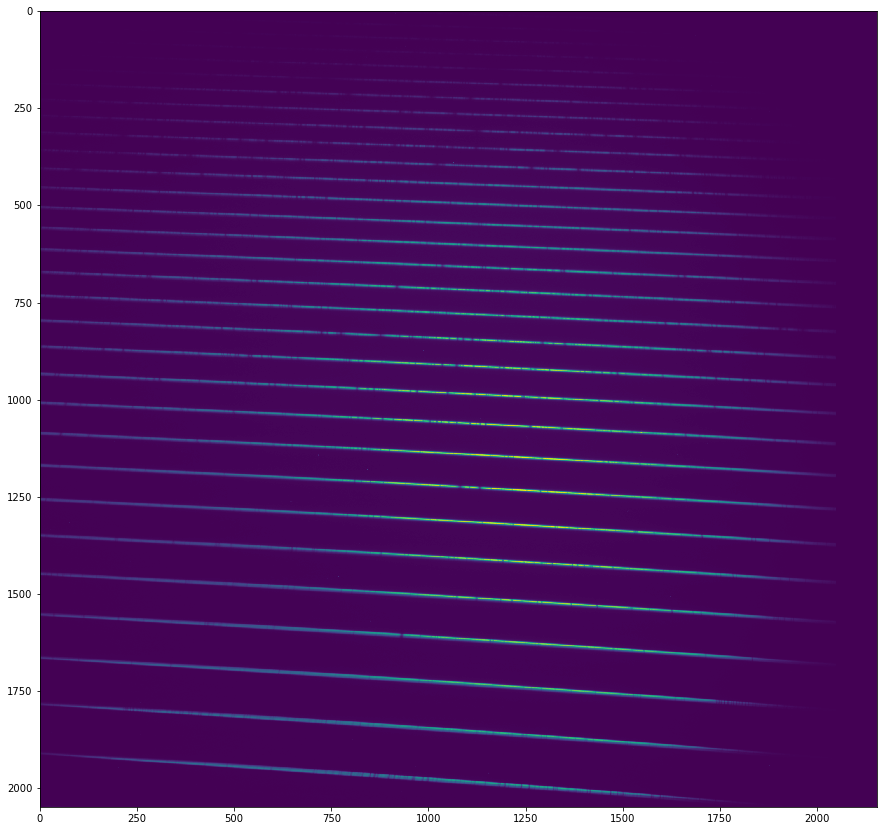

In [103]:
# and can be seen with [we need to import matplotlib.pyplot as plt before running this]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,15))
ax.imshow(data)

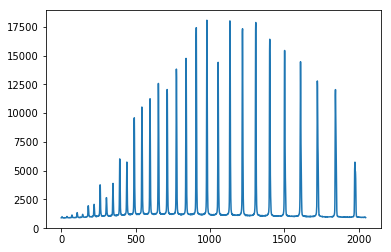

In [104]:
# A column from the data can be plotted with 
plt.plot(data[:,1000])
# where I am plotting the column number 1000. 

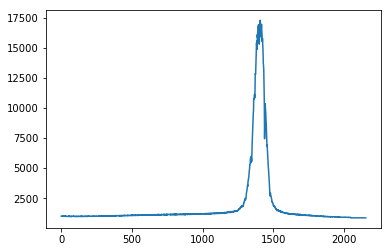

In [105]:
# In the same way a line from the data is plotted with: 
plt.plot(data[1000,:])

In [106]:
# For this example I'll use a spectrum obtain with the high dispersion camera on board of IUE. 
# The file is opened as usual:
hdulist = fits.open('swp04345.mxhi')

The file is there: https://github.com/Morisset/Python-lectures-Notebooks/raw/master/Notebooks/swp04345.mxhi

In [107]:
#but now hdulist has 2 elements (2 header/data units):
len(hdulist)

2

In [108]:
# We can see that the primary header has dimension (), son does not contain any data. 
# The data are in the extension.
hdulist.info()

Filename: swp04345.mxhi
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     421   ()      
  1  MEHI        BinTableHDU     61   60R x 17C   [1B, 1I, 1D, 1I, 1D, 1E, 1E, 768E, 768E, 768E, 768I, 768E, 768E, 1I, 1I, 1E, 7E]   


In [109]:
# The first header contains the minimal infirmation:
print(hdulist[0].header.cards[:5])

('SIMPLE', True, 'Standard FITS Format')
('BITPIX', 8, 'Binary data')
('NAXIS', 0, 'Two-dimensional image')
('EXTEND', True, 'Extensions are present')
('TELESCOP', 'IUE', 'International Ultraviolet Explorer')


In [110]:
# The number of axis is 0 which means there is no data block in the primary HDU. 
# The header of the second HDU begins with the keyword XTENSION and with the specification of the data
print(hdulist[1].header.cards[:5])

('XTENSION', 'BINTABLE', 'Binary table extension')
('BITPIX', 8, 'Binary data')
('NAXIS', 2, 'Two-dimensional table array')
('NAXIS1', 16961, 'Width of row in bytes')
('NAXIS2', 60, 'Number of orders')


In [111]:
# To progress further we need to know what is in the table. 
# As usual, the columns have names and type of the stored data. 
# These information can be obtained using the column attribute of hdulist:
cols = hdulist[1].columns

In [112]:
# the cols.info returns the names of the columns and the information of their format and units.
cols.info

<bound method ColDefs.info of ColDefs(
    name = 'ORDER'; format = '1B'
    name = 'NPOINTS'; format = '1I'
    name = 'WAVELENGTH'; format = '1D'; unit = 'ANGSTROM'
    name = 'STARTPIX'; format = '1I'; unit = 'PIXEL'
    name = 'DELTAW'; format = '1D'; unit = 'ANGSTROM'
    name = 'SLIT HEIGHT'; format = '1E'; unit = 'PIXEL'
    name = 'LINE_FOUND'; format = '1E'; unit = 'PIXEL'
    name = 'NET'; format = '768E'; unit = 'FN'
    name = 'BACKGROUND'; format = '768E'; unit = 'FN'
    name = 'NOISE'; format = '768E'; unit = 'FN'
    name = 'QUALITY'; format = '768I'
    name = 'RIPPLE'; format = '768E'; unit = 'FN'
    name = 'ABS_CAL'; format = '768E'; unit = 'ERG/CM2/S/A'
    name = 'START-BKG'; format = '1I'; unit = 'PIXEL'
    name = 'END-BKG'; format = '1I'; unit = 'PIXEL'
    name = 'SCALE_BKG'; format = '1E'
    name = 'COEFF'; format = '7E'
)>

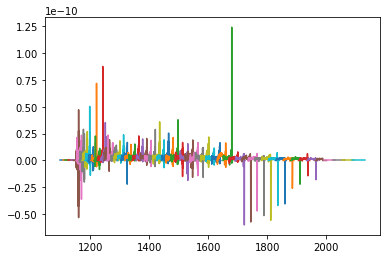

In [113]:
# The data are available using (this example is NOT the right way of plotting the data, it's just an example) 
# and don't forget to import numpy as np to have np.arange working]:

data1 = hdulist[1].data
DTs =  data1.ABS_CAL
WLs = data1.WAVELENGTH
DWs = data1.DELTAW
for WL, DW, DT in zip(WLs, DWs, DTs):
    plt.plot(WL + np.arange(len(DT)) * DW, DT)

### Writing FITS files

In [114]:
# Creation of numpy array with the data. 
x = np.arange(100)

In [115]:
# Creation of the HDU from the data. 
hdu = fits.PrimaryHDU(x)
print(hdu.header.cards)

('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', 64, 'array data type')
('NAXIS', 1, 'number of array dimensions')
('NAXIS1', 100, '')
('EXTEND', True, '')


In [116]:
#Adding additional keywords to the header. 
# The automatically created header contains only the required minimum of keywords. 
# If additional keywords are needed they are added with:
hdu.header['testkey'] = (0.001,'some test value')

In [117]:
print(hdu.header.cards)

('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', 64, 'array data type')
('NAXIS', 1, 'number of array dimensions')
('NAXIS1', 100, '')
('EXTEND', True, '')
('TESTKEY', 0.001, 'some test value')


In [118]:
hdulist = fits.HDUList([hdu])
hdulist.writeto('new.fits', overwrite=True) 
hdulist.close()

Another way to deal with FITS tables is to use the ATpy library, we'll see this later